In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Initialize an empty list to store JSON objects
json_data = []

# Load each JSON object from each line
with open('sample_tiny.json', 'r') as file:
    for line in file:
        try:
            json_object = json.loads(line)
            json_data.append(json_object)
        except json.JSONDecodeError:
            print("Error decoding JSON from line:", line)

# Convert the list of JSON objects to a DataFrame
df = pd.DataFrame(json_data)

In [3]:
df.head()

,ts,visitor_uuid,visitor_source,visitor_device,visitor_useragent,visitor_ip,visitor_country,visitor_referrer,env_type,env_doc_id,...,env_build,env_name,env_component,visitor_username,event_index,subject_infoboxid,subject_url,cause_position,cause_adid,env_adid
0,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1393631983,232eeca785873d35,internal,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,fcf9c67037f993f0,MX,63765fcd2ff864fd,stream,NaN,...,1.7.118-b946,explore,editors_picks,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1024, 27)

In [25]:
percent_missing = {}

for col in df.columns:
    percent_missing[col] = ((df[col].isna().sum() / df.shape[0]) * 100).round(2)

# sort in descending order
percent_missing = dict(sorted(percent_missing.items(), key=lambda item: item[1], reverse=True))

# print column name and percentage of missing values
for col, percent in percent_missing.items():
    print(col, percent)

cause_adid 99.9
env_adid 99.9
subject_infoboxid 99.51
subject_url 99.51
event_index 99.22
cause_position 98.93
env_build 96.48
env_name 96.48
env_component 96.48
visitor_username 96.39
env_ranking 96.0
cause_type 60.45
event_readtime 59.28
env_doc_id 4.79
subject_doc_id 1.27
subject_page 1.27
subject_type 0.78
visitor_referrer 0.1
ts 0.0
visitor_uuid 0.0
visitor_source 0.0
visitor_device 0.0
visitor_useragent 0.0
visitor_ip 0.0
visitor_country 0.0
env_type 0.0
event_type 0.0


## Analysis and Visualization

### Views by Country

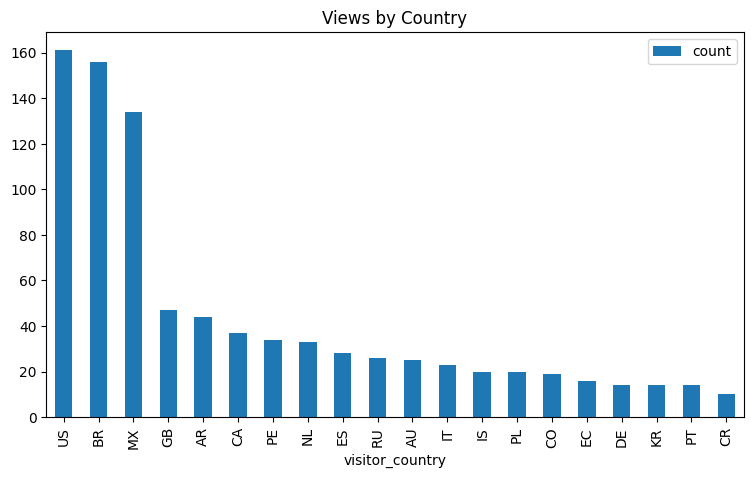

In [54]:
views_by_country = df.groupby("visitor_country").agg({"visitor_country": "count"}).rename(columns={"visitor_country": "count"}).sort_values(by="count", ascending=False)

# Plot the top 20 countries by views
views_by_country.head(20).plot(kind="bar", figsize=(9, 5), title="Views by Country")
plt.show()

### Views by Continent

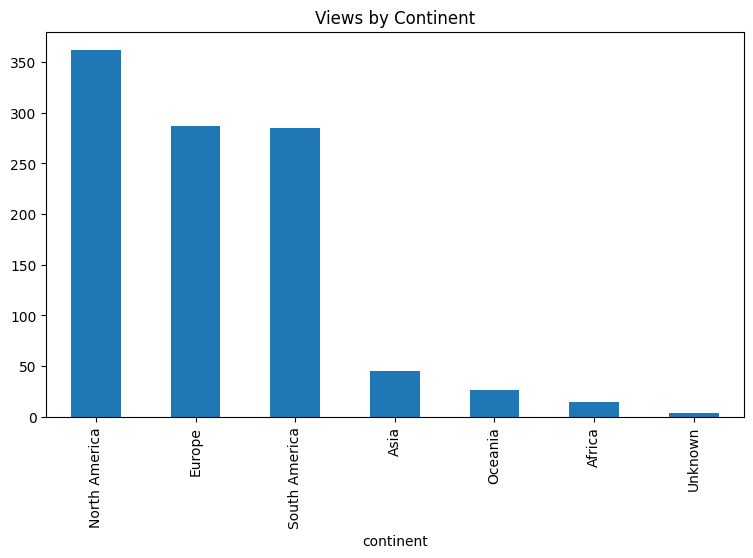

In [55]:
import pycountry_convert as pc
import pandas as pd
import matplotlib.pyplot as plt

# Function to get continent from country code using pycountry_convert
def country_code_to_continent(country_code):
    try:
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return "Unknown"  # for codes that are not found or invalid


# Apply the function to your DataFrame
df['continent'] = df['visitor_country'].apply(country_code_to_continent)

# Group by continent and count views
views_by_continent = df.groupby(
    "continent").size().sort_values(ascending=False)

# Plot the views by continent
views_by_continent.plot(kind="bar", figsize=(9, 5), title="Views by Continent")
plt.show()

### Views by Browser

## Should we do point a in this task? Because origin column is very noisy

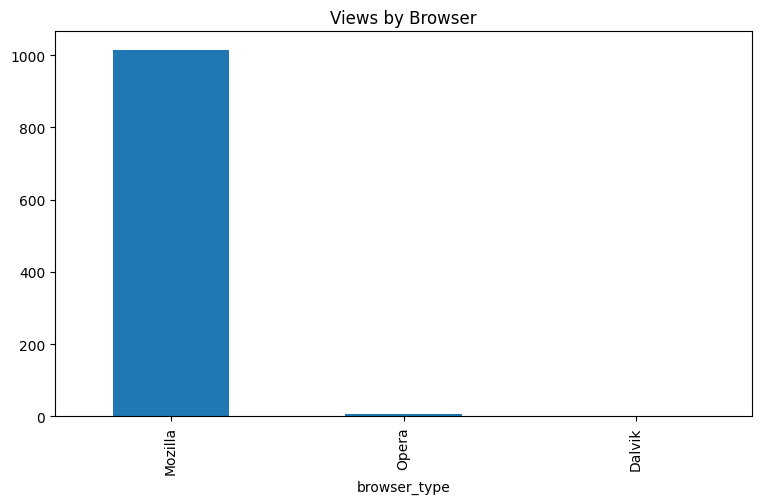

In [76]:
df['browser_type'] = df['visitor_useragent'].str.split('/').str[0]
views_by_browser = df.groupby("browser_type").size().sort_values(ascending=False)

# Plot the top browsers by views
views_by_browser.plot(kind="bar", figsize=(9, 5), title="Views by Browser")
plt.show()

### Reader profiles: top 10 reader of the website

In [86]:
df['env_type'].value_counts()

env_type
reader    975
stream     49
Name: count, dtype: int64

In [84]:
df.columns

Index(['ts', 'visitor_uuid', 'visitor_source', 'visitor_device',
       'visitor_useragent', 'visitor_ip', 'visitor_country',
       'visitor_referrer', 'env_type', 'env_doc_id', 'event_type',
       'subject_type', 'subject_doc_id', 'subject_page', 'cause_type',
       'event_readtime', 'env_ranking', 'env_build', 'env_name',
       'env_component', 'visitor_username', 'event_index', 'subject_infoboxid',
       'subject_url', 'cause_position', 'cause_adid', 'env_adid', 'continent',
       'browser_type'],
      dtype='object')

In [83]:
# Top ten readers by time spent on the site
df[df["env_type"] == "reader"].groupby("visitor_uuid").agg({"event_readtime": "sum"}).sort_values(
    by="event_readtime", ascending=False).head(10)

,event_readtime
visitor_uuid,
849bb060cb110347,486053.0
b3ded380cc8fdd24,68250.0
edcfe5dd30027a43,68166.0
965ce44fd1972faf,47333.0
6173ebf3e897b273,39501.0
9e128338491e90fa,39417.0
9b4e241081ea345e,33595.0
abe908c640c33af7,27416.0
c5650aac730ee646,22916.0


### "Also likes" functionality

In [87]:
df.columns

Index(['ts', 'visitor_uuid', 'visitor_source', 'visitor_device',
       'visitor_useragent', 'visitor_ip', 'visitor_country',
       'visitor_referrer', 'env_type', 'env_doc_id', 'event_type',
       'subject_type', 'subject_doc_id', 'subject_page', 'cause_type',
       'event_readtime', 'env_ranking', 'env_build', 'env_name',
       'env_component', 'visitor_username', 'event_index', 'subject_infoboxid',
       'subject_url', 'cause_position', 'cause_adid', 'env_adid', 'continent',
       'browser_type'],
      dtype='object')

In [90]:
df['subject_doc_id'].describe()

count                                              1011
unique                                              341
top       140206010823-b14c9d966be950314215c17923a04af7
freq                                                 42
Name: subject_doc_id, dtype: object

In [91]:
df['env_doc_id'].describe()

count                                               975
unique                                              296
top       140206010823-b14c9d966be950314215c17923a04af7
freq                                                 42
Name: env_doc_id, dtype: object

In [106]:
reader_df = df[df["env_type"] == "reader"]

# A) Get all readers for a given doc_uuid


def get_readers_of_document(df, doc_uuid):
    """ Returns all visitor UUIDs of readers of the specified document """
    readers = df[df['env_doc_id'] == doc_uuid]['visitor_uuid'].unique()
    return readers


# B) Get all docs read by a given visitor_uuid
def get_documents_read_by_visitor(df, visitor_uuid):
    """ Returns all document UUIDs read by the specified visitor """
    documents = df[df['visitor_uuid'] == visitor_uuid]['env_doc_id'].unique()
    return documents


# C) "also like" functionality
def also_like(doc_uuid, df, sorting_func=None, visitor_uuid=None):
    """ 
    Returns a list of documents that are 'liked' by readers of a given document,
    sorted by the sorting function.
    """
    readers = get_readers_of_document(df, doc_uuid)
    liked_documents = set()

    for reader in readers:
        if reader != visitor_uuid: # Optional: Exclude the specified visitor's own reads
            liked_documents.update(get_documents_read_by_visitor(df, reader))

    # Apply the sorting function and return the top 10
    return sorted(liked_documents, key=sorting_func)[:10]

# D) Define a sorting function
def sort_by_readers_count(document_uuid):
    """ Define a sorting function based on the number of readers """
    readers_count = len(get_readers_of_document(df, document_uuid))
    return readers_count


# Example usage
some_document_uuid = "140224195414-e5a9acedd5eb6631bb6b39422fba6798"

top_10_liked_documents = also_like(
    some_document_uuid, sorting_func=sort_by_readers_count, df=reader_df)

top_10_liked_documents

['140224195414-e5a9acedd5eb6631bb6b39422fba6798']

In [109]:
from graphviz import Digraph


def create_graph(input_doc, related_docs, readers):
    dot = Digraph(comment='Also Likes Graph')

    # Add the input document (highlighted in green)
    dot.node(input_doc[-4:], input_doc[-4:], color='green')

    # Add related documents and readers
    for doc in related_docs:
        if doc != input_doc:
            dot.node(doc[-4:], doc[-4:])
        for reader in readers[doc]:
            dot.node(reader[-4:], reader[-4:])
            dot.edge(reader[-4:], doc[-4:])

    return dot


# Define the list of related document UUIDs and their readers
# The following is an example; you should use the output from your 'also_like' function
input_document_uuid = "140224195414-e5a9acedd5eb6631bb6b39422fba6798"
# The result from your also_like function
related_documents_uuids = top_10_liked_documents
readers_info = {doc: get_readers_of_document(
    reader_df, doc) for doc in related_documents_uuids}

# Create the graph
dot = create_graph(input_document_uuid, related_documents_uuids, readers_info)

# Render the graph to a file (in this case, a PostScript file)
output_path = '/Users/ilya/Desktop/GitHub_Repositories/HW_University/Industrial/Python/CW/also_likes_graph'
dot.render(output_path, format='ps', cleanup=True)

# Provide the path to the generated file
output_path + '.ps'

'/Users/ilya/Desktop/GitHub_Repositories/HW_University/Industrial/Python/CW/also_likes_graph.ps'

In [96]:
reader_df = df[df["env_type"] == "reader"]

# Implement a function that takes a document UUID and returns all visitor UUIDs of readers of that document.
def get_readers(doc_uuid):
    return reader_df[reader_df["env_doc_id"] == doc_uuid]["visitor_uuid"].unique()

# Implement a function that takes a visitor UUID and returns all document UUIDs that have been read by this visitor.
def get_read_docs(visitor_uuid):
    return reader_df[reader_df["visitor_uuid"] == visitor_uuid]["env_doc_id"].unique()


# Implement a function that takes a document UUID and (optionally) visitor UUID, and a sorting function on documents.
# The function should return a list of "liked" documents, sorted by the sorting function parameter.
def also_like(doc_uuid, visitor_uuid=None, sorting_func=None):
    # Get all visitor UUIDs of readers of the given document UUID
    readers = get_readers(doc_uuid)
    
    # If visitor UUID is provided, remove it from the list of readers
    if visitor_uuid:
        readers = [r for r in readers if r != visitor_uuid]
    
    # Get all document UUIDs that have been read by the readers
    read_docs = [get_read_docs(r) for r in readers]
    
    # Flatten the list of document UUIDs and remove duplicates
    read_docs = list(set([d for docs in read_docs for d in docs]))
    
    # Sort the list of "liked" documents using the sorting function parameter
    if sorting_func:
        read_docs = sorted(read_docs, key=sorting_func)
    
    return read_docs


# Define the sorting function based on the number of readers of the same document
def sort_by_readers(doc_uuid):
    return len(get_readers(doc_uuid))


# Get the "also like" list of documents based on the sorting function and the provided document and visitor UUIDs
doc_uuid = "140224195414-e5a9acedd5eb6631bb6b39422fba6798"
visitor_uuid = "ade7e1f63bc83c66"
liked_docs = also_like(doc_uuid, visitor_uuid, sort_by_readers)[:10]

# Print the top 10 document UUIDs
print(liked_docs)

['140224195414-e5a9acedd5eb6631bb6b39422fba6798']
